# <center> Topic : Mulitivariate Analysis on Factors Influencing an Athelete's Performance
**Team Name:** W Sports Insights

**Team Members:** Jack Chua (chjack21), Leila Massjouni (leilamassjouni), Michelle Niland (michelle21), Henry Pitts (Kinghenry430), Kunal Jha (Jkunal)


We explored this project to see if the performance of atheletes can be explained using quantiative variables such as the athelete's age, salary, and discipline. We ultimately shortlisted the list to look at soccer, football and basketball due to the shared similarity in how the sport overall works.

Analysis will also be emphasized on analyzing the relationship between these factors and how they are indepedently and collectively explain an athelet's performance across the different sports.

Our overall data science cycle involves with first starting the data science cycle with building the model for one sport (soccer) and then repeating the same whole data cycle for 2 other sports (football and basketball). We then consilidate the findings to note down the differences in ouput or extract any further insights

**Questions to be Addressed:**

1) How do player's salaries or market value accolades across different sports?

2) Can such factors be generalized and applicable to different sports?

3) Does one factor outweight the other in heavily affects an athelete's performance

**Data Methods to be Used:**

1) Filtering missing values, standardizing data, creating new data values with existing data values 

2) Using Multiple Linear Regression to model the dependent variable (performance).

3) Creating visualizations of the data to help further convey our findings 


**Definitions:**

1) Performance - measured in goals or points scored during a given game

2) Discipline - way to measure fouls, cards; differs depending on the sport analyzed





# <center> Analysis
    
### The data that was used across the 3 sports are sourced from kaggle :

Soccer: https://www.kaggle.com/datasets/sanjeetsinghnaik/most-expensive-footballers-2021/data

Football: https://www.kaggle.com/datasets/loganlauton/nfl-player-data, https://www.spotrac.com/nfl/rankings/2021/quarterback/base/robots.txt 

Basketball: https://www.kaggle.com/datasets/vivovinco/20222023-nba-player-stats-regular

### We first read, gather and explore all the datasets to fully prepare them for data processing such as data cleaning and computation of additional columns to fully meet our metics.

In [1]:
import pandas as pd

soccer = pd.read_csv("../Project/Data/2021.csv")
basketball = pd.read_csv("../Project/Data/nba.csv")
football = pd.read_csv("../Project/Data/nfl.csv")

### After scouting the datasets of all 3 sports above, we only kept certain columns to set it as a staging table/dataframe for easier reference and prevent clutering.

In [2]:
# create variables to only keep relevant columns for all 3 sports
soccer_columns = ['Name','Club','Position','Age', 'Markey Value In Millions(£)', 'Matches','Goals', 
                       'Yellow Cards', 'Red Cards']

football_columns = ['Season','Player', 'Tm', 'Age', 'Pos', 'G', 'Pts', 'Pts/G', 'RshTD','RecTD']

basketball_columns = ['Player Name', 'Salary', 'Position', 'Age', 'Team', 'GP', 'PTS','PF'] 


# make a copy from all the original DF to include only relevant columns
soc = soccer[soccer_columns].copy()
foot = football[football_columns].copy()
bball = basketball[basketball_columns].copy()


### After exploring our staging table/dataframe for each sport, we did some data cleaning and further processing to specifically tackle and address the issues we found such as :

#### 1) Spelling Errors 

#### 2) Omitting Redundant Rows

#### 3) Computing Additional Columns
- since Discipline is hard to measure across all 3 sports, we define it to be the "total number of warnings (yellow and red cards as warnings) in soccer , "total number of rushing and receiving touchdowns" in football (since its a QB's job) and   "Personal Fouls" in basketball 

#### 4) NaN Values
- some soccer players have scored 0 points, we we replace NaN values to make sure it did not affect our data standardization

#### 5) Data Standardization
- standardization all the columns that will be as regressors/independent variables used as since there are varifying values across all 3 sports

In [15]:
# SOCCER
# cleaning spelling error
soc.rename(columns={'Markey Value In Millions(£)': 'Market Value In Millions (£)'}, inplace=True)

# only filtering soccer players who are in attacking positions
soc_attack = ['Attacking Midfield', ' Right Winger', 'Left Winger', 'Centre-Forward','Second Striker']
soc = soc.loc[soc['Position'].isin(soc_attack)]

# computing new columns for soccer
soc['Goals per Game'] = soc['Goals'] / soc['Matches']
soc['Cards per Game'] = (soc['Yellow Cards'] + soc['Red Cards']) / (soc['Matches'])
soc['Discipline Index'] = 1 / (1 + soc['Cards per Game'])

# converting NaN values to 0
soc['Goals per Game'].fillna(0, inplace=True)
soc['Discipline Index'].fillna(0, inplace=True)

# standardization columns that are used for regression
soc['Age'] = (soc['Age'] - soc['Age'].mean()) / soc['Age'].std()
soc['Market Value In Millions (£)'] = (soc['Market Value In Millions (£)'] - soc['Market Value In Millions (£)'].mean()) / soc['Market Value In Millions (£)'].std()
soc['Discipline Index'] = (soc['Discipline Index'] - soc['Discipline Index'].mean()) / soc['Discipline Index'].std()
soc['Goals per Game'] = (soc['Goals per Game'] - soc['Goals per Game'].mean()) / soc['Goals per Game'].std()



# FOOTBALL
# renaming columns 
foot.rename(columns={'Tm': 'Team'}, inplace=True)
foot.rename(columns={'Pos': 'Position'}, inplace=True)
foot.rename(columns={'G': 'Games Played'}, inplace=True)
foot.rename(columns={'Pts': 'Points'}, inplace=True)
foot.rename(columns={'Pts/G': 'Points per Game'}, inplace=True)
foot.rename(columns={'RshTD': 'Rushing Touchdown'}, inplace=True)
foot.rename(columns={'RecTD': 'Receiving Touchdown'}, inplace=True)

# converting NaN values to 0
foot['Rushing Touchdown'].fillna(0, inplace=True)
foot['Receiving Touchdown'].fillna(0, inplace=True)

# only filtering football players to the 2021 season and who are in qb positions
foot = foot[foot['Season'] == 2021]
foot = foot[foot['Position'] == 'QB']
foot['Discipline'] = foot['Rushing Touchdown'] + foot['Receiving Touchdown']

# computing new columns for football players salaries
foot['Salary'] = pd.NA
salaries_list = [883871, 1500000, 920000, 920000, 1034000, 850000, 2250000, 660000, 1818125, 24100000, 1100000, 780000, 2500000, 850000, 990000, 1075000, 4250000, 780000, 660000, 780000, 1771588, 660000, 1057347, 19000000, 1000000, 660000, 2750000, 2000000, 2500000, 21000000, 1075000, 1771588, 1750000, 920000, 1075000, 990000, 1075000, 2000000, 15400000, 1000000, 238888, 1172884, 660000, 850000]
foot['Salary'] = salaries_list

# standardization columns that are used for regression
foot['Age'] = (foot['Age'] - foot['Age'].mean()) / foot['Age'].std()
foot['Salary'] = (foot['Salary'] - foot['Salary'].mean()) / foot['Salary'].std()
foot['Discipline'] = (foot['Discipline'] - foot['Discipline'].mean()) / foot['Discipline'].std()



# BASKETBALL 
# renaming columns 
bball.rename(columns={'PF': 'Personal Fouls'}, inplace=True)
bball.rename(columns={'PTS': 'Points per Game'}, inplace=True)
bball.rename(columns={'GP': 'Games Played'}, inplace=True)

# standardization columns that are used for regression
bball['Age'] = (bball['Age'] - bball['Age'].mean()) / bball['Age'].std()
bball['Salary'] = (bball['Salary'] - bball['Salary'].mean()) / bball['Salary'].std()
bball['Personal Fouls'] = (bball['Personal Fouls'] - bball['Personal Fouls'].mean()) / bball['Personal Fouls'].std()


# view all df
display(soc.head())
display(foot.head())
display(bball.head())

,Name,Club,Position,Age,Market Value In Millions (£),Matches,Goals,Yellow Cards,Red Cards,Goals per Game,Cards per Game,Discipline Index
0,Kylian Mbappé,Paris Saint-Germain,Centre-Forward,-0.860380,4.972614,16,7,3,0,0.578502,0.187500,-0.276407
1,Erling Haaland,Borussia Dortmund,Centre-Forward,-1.143174,4.565347,10,13,1,0,4.230150,0.100000,0.136731
2,Harry Kane,Tottenham Hotspur,Centre-Forward,0.836385,3.343544,16,7,2,0,0.578502,0.125000,0.012134
3,Jack Grealish,Manchester City,Left Winger,0.270797,2.529009,15,2,1,0,-0.709278,0.066667,0.311946
5,Romelu Lukaku,Chelsea FC,Centre-Forward,0.836385,2.529009,11,4,0,0,0.265778,0.000000,0.697420


,Season,Player,Team,Age,Position,Games Played,Points,Points per Game,Rushing Touchdown,Receiving Touchdown,Discipline,Salary
27024,2021,Jalen Hurts,PHI,-0.958542,QB,15.0,60.0,4.0,10.0,0.0,3.790226,-0.378374
27059,2021,Ryan Tannehill,TEN,0.958542,QB,17.0,42.0,2.5,7.0,0.0,2.318726,-0.267106
27062,2021,Josh Allen,BUF,-0.575125,QB,17.0,40.0,2.4,6.0,0.0,1.828226,-0.371849
27101,2021,Sam Darnold,CAR,-0.766834,QB,12.0,30.0,2.5,5.0,0.0,1.337727,-0.371849
27104,2021,Taysom Hill,NOR,0.575125,QB,12.0,30.0,2.5,5.0,0.0,1.337727,-0.351262


,Player Name,Salary,Position,Age,Team,Games Played,Points per Game,Personal Fouls
0,Stephen Curry,3.703117,PG,1.913370,GSW,56,29.4,0.511246
1,John Wall,3.635481,PG,1.445546,LAC,34,11.4,-0.003583
2,Russell Westbrook,3.610679,PG,1.913370,LAL/LAC,73,15.9,0.639954
3,LeBron James,3.367388,PF,2.849018,LAL,55,28.9,-0.132290
4,Kevin Durant,3.334222,PF,1.913370,BRK/PHO,47,29.1,0.511246


### From the outputs above, we can see the head of all that dataframe of all the cleaned that will be used as the staging/reference table for our regression analysis,

We found soccer and football to have require the most data cleaning and processing due to the fact that athelets in these sports have very specific roles and not everyone has equal chance of scoring in games like basketball. Hence, we filter the data to only use all the attackers for soccer and quarterbacks for football.

### Here we compute the multiple regression model for each sport and specifically focus on R-squared value as a metric to assess the performance of our models in terms of seeing how well the independent variables/regressors (age, market value/salary, discipline) explain the dependent variable (Goals or Points per Game).

In [4]:
import statsmodels.api as sm

# soccer regression model 
soc_X = soc[['Age','Market Value In Millions (£)', 'Discipline Index']]
soc_Y = soc['Goals per Game']

soc_X = sm.add_constant(soc_X)

soc_model = sm.OLS(soc_Y, soc_X).fit()
soc_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Goals per Game   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     6.467
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           0.000368
Time:                        23:34:44   Log-Likelihood:                -224.24
No. Observations:                 165   AIC:                             456.5
Df Residuals:                     161   BIC:                             468.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -7.078e-16      0.074  -9.54e-15      1.000      -0.147       0.147
Age                              0.1061      0.075      1.423      0.157      -0.041       0.253
Market Value In Millions (£)     0.2467      0.075      3.305      0.001       0.099       0.394
Discipline Index                 0.1631      0.075      2.183      0.030       0.016       0.311
==============================================================================
Omnibus:                       43.829   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.729
Skew:                           1.275   Prob(JB):                     4.87e-18
Kurtosis:                       5.257   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# football regression model 
nfl_X = foot[['Age', 'Discipline', 'Salary']]
nfl_Y = foot['Points per Game'] 

nfl_X = sm.add_constant(nfl_X)

nfl_model = sm.OLS(nfl_Y, nfl_X).fit()
nfl_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Points per Game   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     40.65
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           3.20e-12
Time:                        23:34:44   Log-Likelihood:                -27.282
No. Observations:                  44   AIC:                             62.56
Df Residuals:                      40   BIC:                             69.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2455      0.071     17.511      0.000       1.102       1.389
Age           -0.0118      0.074     -0.159      0.875      -0.162       0.138
Discipline     0.7813      0.072     10.792      0.000       0.635       0.928
Salary        -0.0920      0.074     -1.244      0.221      -0.241       0.057
==============================================================================
Omnibus:                       25.122   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.828
Skew:                           1.739   Prob(JB):                     1.36e-09
Kurtosis:                       6.190   Cond. No.                         1.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# basketball regression model 
nba_X = bball[['Age','Salary', 'Personal Fouls']]
nba_Y = bball['Points per Game']

nba_X = sm.add_constant(nba_X)

nba_model = sm.OLS(nba_Y, nba_X).fit()  
nba_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Points per Game   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     307.7
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          7.85e-110
Time:                        23:34:44   Log-Likelihood:                -1308.5
No. Observations:                 467   AIC:                             2625.
Df Residuals:                     463   BIC:                             2642.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.1300      0.185     49.275      0.000       8.766       9.494
Age               -1.4120      0.205     -6.878      0.000      -1.815      -1.009
Salary             4.6935      0.224     20.946      0.000       4.253       5.134
Personal Fouls     2.2603      0.204     11.062      0.000       1.859       2.662
==============================================================================
Omnibus:                       44.100   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.109
Skew:                           0.450   Prob(JB):                     1.37e-26
Kurtosis:                       5.305   Cond. No.                         1.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As seen from all the outpus above, all sports showed a relatively strong r-square (0.75 for football, 0.66 for basketball) except for soccer (0.108).

## We then compute the correlation matrix and partial regression plots for each sport to see how related are each regressors to one another 

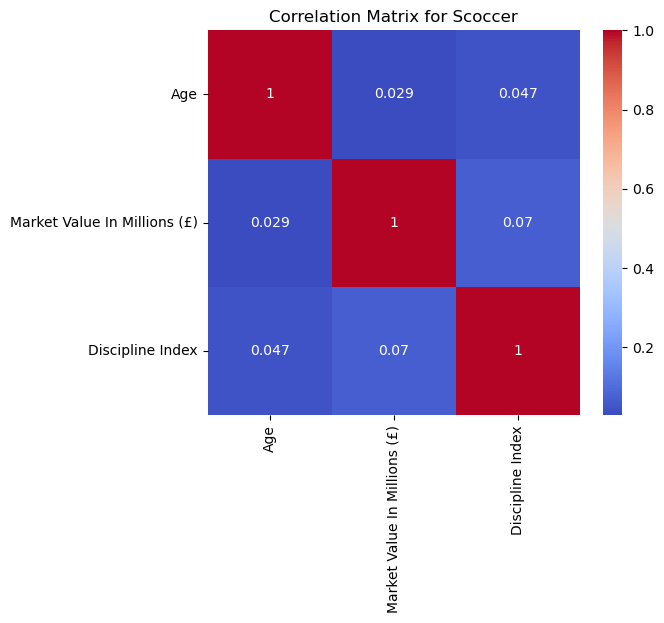

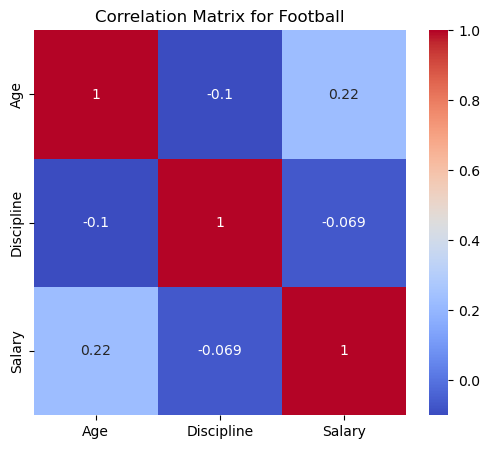

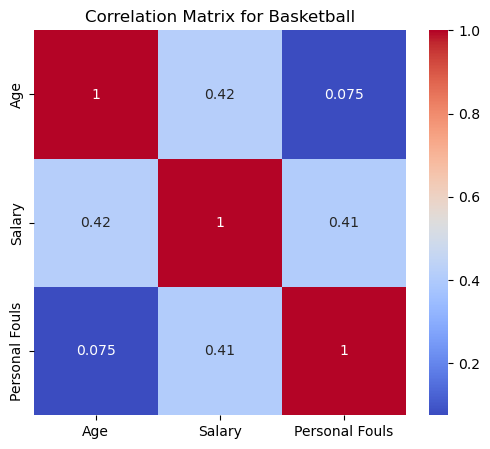

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt

matrix_columns = ['Age' , 'Market Value In Millions (£)', 'Discipline Index']
soc_matrix = soc[matrix_columns].corr()

plt.figure(figsize=(6, 5))

sb.heatmap(soc_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation Matrix for Scoccer") 
plt.show()

matrix_columns = ['Age' , 'Discipline', 'Salary']
foot_matrix = foot[matrix_columns].corr()

plt.figure(figsize=(6, 5))

sb.heatmap(foot_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Football") 

plt.show()


matrix_columns = ['Age' , 'Salary', 'Personal Fouls']
bball_matrix = bball[matrix_columns].corr()

plt.figure(figsize=(6,5))

sb.heatmap(bball_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation Matrix for Basketball") 

plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


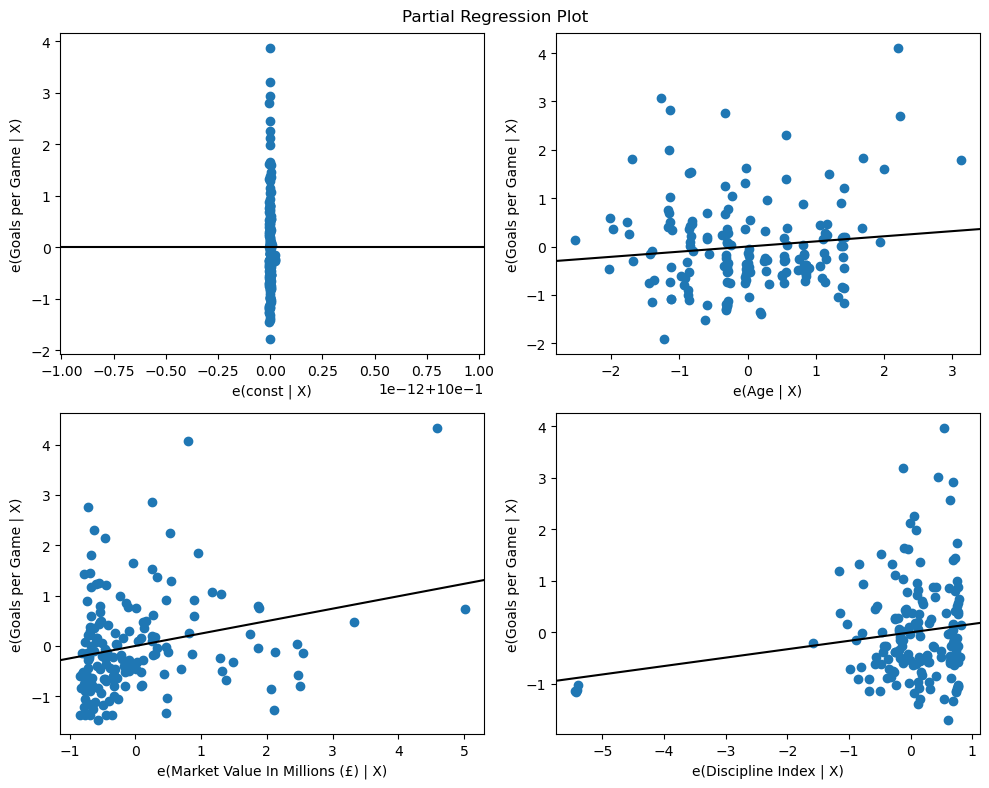

In [8]:
fig = plt.figure(figsize=(10, 8))
sm.graphics.plot_partregress_grid(soc_model, fig=fig)
plt.show()

### From the output above, all the regressors in soccer seemed to show an overall positive relationship

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


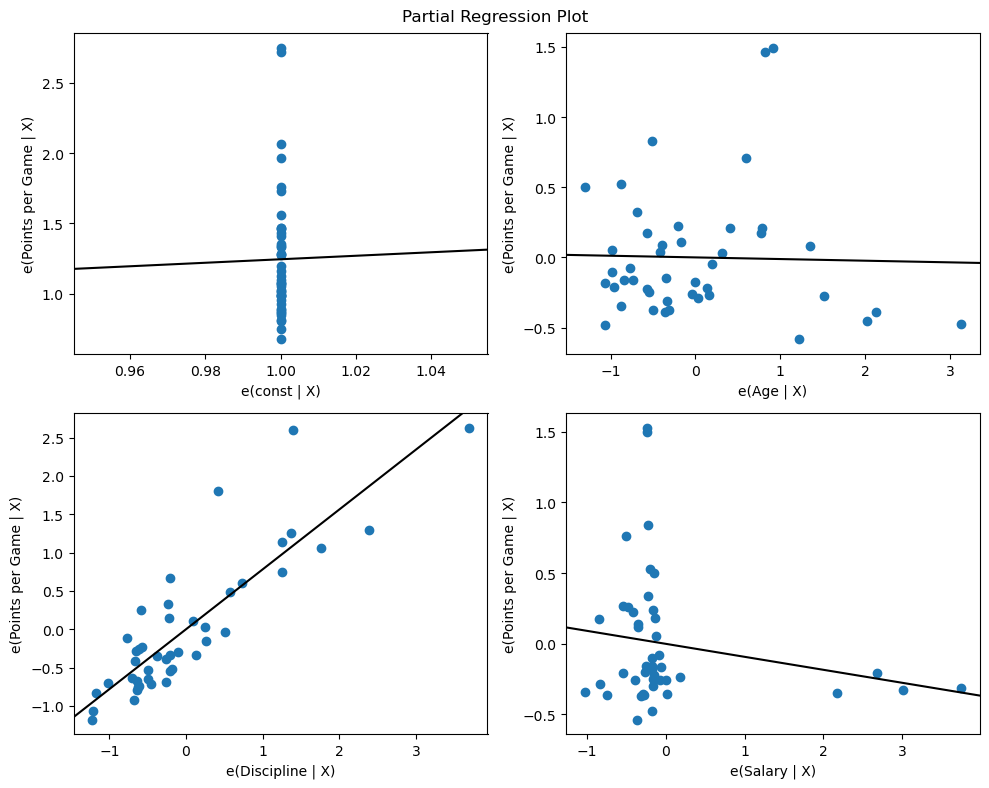

In [9]:
fig = plt.figure(figsize=(10, 8))
sm.graphics.plot_partregress_grid(nfl_model, fig=fig)
plt.show()

### From the output above for football, it seems that 'Discipline' is the only regressor that shows a positive relationship

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


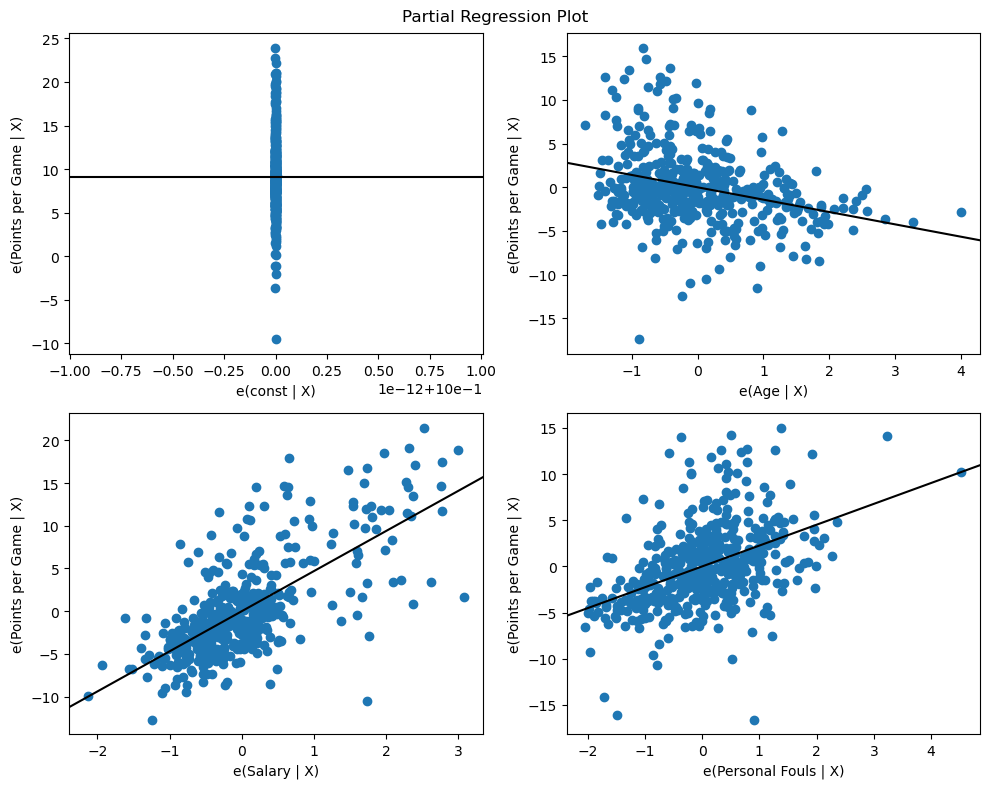

In [10]:
fig = plt.figure(figsize=(10, 8))
sm.graphics.plot_partregress_grid(nba_model, fig=fig)
plt.show()

### From the output above for Basketball, it seems that all regressors except 'Age' are positive.

### All and all, the partial regression plots for all sports above overall showed a positive relationship for most regressors/indepdent variables except:

#### -  Age and Salary in football  

#### - Age in basketball  

## Model Improvisation: to address the low R-Squared value for soccer. We feed the model more data to see if improvements can be made to it


Since the soccer data is about the 2021 season, we obtained additional data from kaggle (https://www.kaggle.com/datasets/darinhawley/fifa-world-cup-goalscorers-19302018) on the players' performance in the 2018 Fifa World Cup. This will be able to contribute to see if their performance in the past affected their performance in 2019 and also since the World Cup is a selective international event in which only top players are able to qualify for it. We merge the new world cup data with the previous soccer dataframe using the inner join method with the soccer in the process below to get attacking players who played in the world cup

In [11]:
fifa18 = pd.read_csv("../Project/Data/worldcupgoals.csv")

fifa18_columns = ['Player','Goals','Country',]
fifa18_new = fifa18[fifa18_columns].copy()

soc_final_data = pd.merge(soc, fifa18_new, left_on='Name', right_on='Player', how='inner')


In [12]:
# revised regression model
fifa_X = soc_final_data[['Age','Market Value In Millions (£)', 'Discipline Index', 'Goals_y']]
fifa_Y = soc_final_data['Goals per Game']

fifa_X = sm.add_constant(fifa_X)

fifa_model = sm.OLS(fifa_Y, fifa_X).fit()  
fifa_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Goals per Game   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     2.589
Date:                Fri, 01 Dec 2023   Prob (F-statistic):             0.0904
Time:                        23:34:49   Log-Likelihood:                -17.806
No. Observations:                  17   AIC:                             45.61
Df Residuals:                      12   BIC:                             49.78
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.1991      0.484     -2.480      0.029      -2.253      -0.146
Age                              0.6750      0.370      1.824      0.093      -0.131       1.481
Market Value In Millions (£)    -0.0238      0.237     -0.101      0.922      -0.540       0.492
Discipline Index                 0.6633      0.564      1.175      0.263      -0.566       1.893
Goals_y                          0.1519      0.198      0.767      0.458      -0.280       0.584
==============================================================================
Omnibus:                        1.122   Durbin-Watson:                   2.407
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                0.217
Skew:                          -0.248   Prob(JB):                        0.897
Kurtosis:                       3.249   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


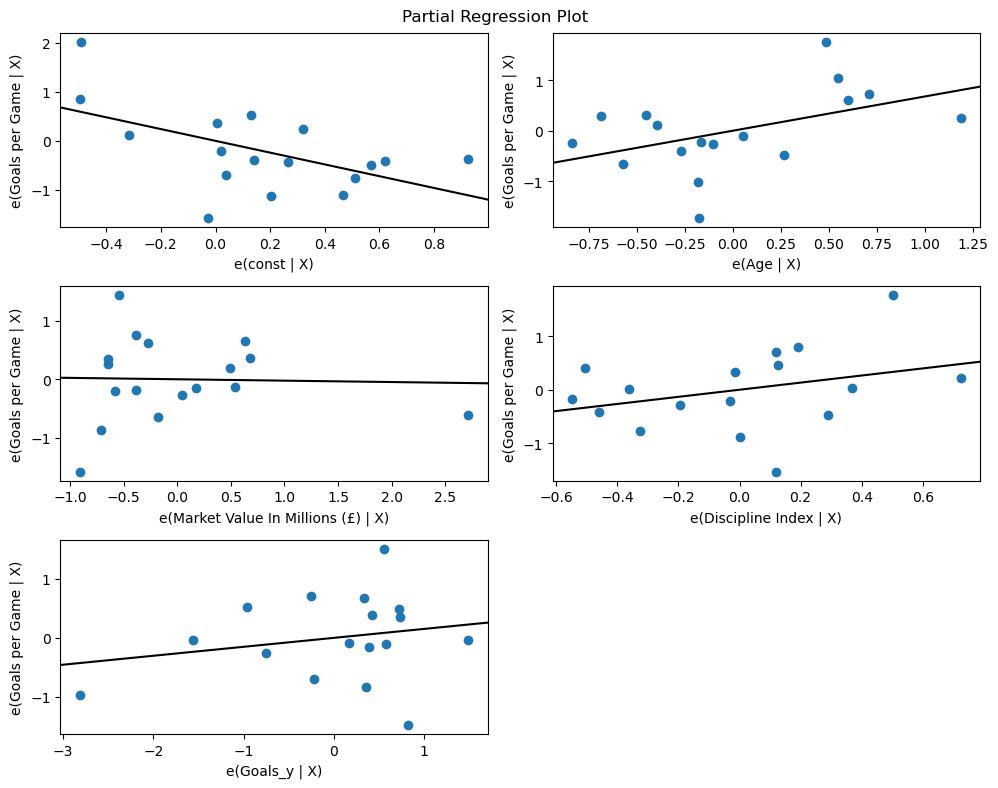

In [13]:
fig = plt.figure(figsize=(10, 8))
sm.graphics.plot_partregress_grid(fifa_model, fig=fig)
plt.show()

### As seen from the ouput above, it seems like the R-Squared value increased to 0.463. This means that the model has overall improved. As seen from the partial regression plot, Goals_y which is the goals scored by players in the 2018 FIFA World Cup have an overall positive relationship 

# <center> Conclusion

## Soccer
From the summary output of our Multiple Linear Regression Model applied to soccer attackers statistics, we found that the value of the R-Squared (0.108) indicates that only about 10.8% of the variability in a attacker's goals per game can be explained by the regressors: Age, Games Played, Points, and Base Salaries. We suspect the reason for such low R-Squqred is because the difference in schedule that soccer matches are played. In football and basketball, there really isn't international events that comes with it while in soccer, the FIFA World Cup is an international event that is a huge pride for soccer players.

To counter the problem, we did some model improvisation to the soccer results by feeding its model more data (from the World Cup) and was successfully able to raise its R-Squared value. We can thus confidently conclude that their past performance does have a strong effect in determine their current performance and hence the overall improvement in the model and positive relationship in all the variables  

## Football
From the summary output of our Multiple Linear Regression Model applied to NFL quarterback statistics, we found that the value of the R-Squared (0.753) indicates that about 75.3% of the variability in a quarterback's points per game can be explained by the regressors: Age, Games Played, Points, and Base Salaries.

However, age and salary seemed to show non-positive relationship as seen from the partial regresson plots and correlation matrix. As evident from the summary of the regression model, both of them also have a relatively high p-value (age: 0.875, salary: 0.221)


## Basketball
From the summary output of our Multiple Linear Regression Model applied to the NBA statistics, we found that the value of the R-Squared (0.666) indicates that about 66.6% of the variability in a points per game can be explained by the regressors: Age, Salary, and Personal Fouls.

The correlation matrix reveals varying degrees of relationship among these factors:

- Salary shows a moderate positive relationship with Age and Personal Fouls.  Age and Personal Fouls have a very weak positive correlation at 0.075. Along with the correlation matrix, each factor has an extremely low p-value which indicates statistical significance in Points per Game. 

- Each of the factors has a p-value close to zero which indicates that Age, Personal Fouls and Salary all have statistical significance in predicting Points per Game.  However, the condition number is rather large which might suggest multicollinearity among some of the variables used in this model.  Further investigation may be necessary such as possible transformations or more data usage prior to the statistical model in order to eliminate this.  


## Overall Key Findings 
- Age, Salary and Discipline can overall be generalized as collective factors to explain an athelete's performance in their respective games due to their relatively strong R-Squared Value.
 


- For football and basketball, age does not seem to be generally a good explanation in an athelete's peformance. While we usually think that a younger athelete would have the pysical advantage, our model proved otherwise. This could potentially be explain by the nature of having breaks invovled in football and basketball where they are played in quarters while soccer players have to play a full 90 minutes with only a 15 minute break after the first 45 minutes. This also raises the question that te older an athelete is, the more experience they are which overal means a better performance.


- Salary is not statistically significant for fotball (as shown from the non-positive relationship in the partial regression plot and high p-value from the model) and this can be explained by the salary cap that presents in the NFL and hence does not . In European Soccer, there is no salary cap while in the NBA, there is only a very soft salary cap.


- From all 3 sports, it seems that Discipline is the variable that outweights other variables and is the only that is consistent across all 3 sports in terms of the relationship it shows to the player's peformance.


- Past performances played a huge part in a soccer player's current performance, this can be seen from the improvisation of our model above in the increase in R-Squared value.